In [214]:
import pandas as pd


In [215]:
url=url = 'https://raw.githubusercontent.com/meganbougle/Adidas/main/Adidas.csv'
df = pd.read_csv(url)


In [216]:
print(df.head())

      Retailer  Retailer ID Invoice Date     Region     State      City  \
0  Foot Locker      1185732     1/1/2020  Northeast  New York  New York   
1  Foot Locker      1185732     1/2/2020  Northeast  New York  New York   
2  Foot Locker      1185732     1/3/2020  Northeast  New York  New York   
3  Foot Locker      1185732     1/4/2020  Northeast  New York  New York   
4  Foot Locker      1185732     1/5/2020  Northeast  New York  New York   

                     Product Price per Unit Units Sold Total Sales  \
0      Men's Street Footwear        $50.00       1,200   $600,000    
1    Men's Athletic Footwear        $50.00       1,000   $500,000    
2    Women's Street Footwear        $40.00       1,000   $400,000    
3  Women's Athletic Footwear        $45.00         850   $382,500    
4              Men's Apparel        $60.00         900   $540,000    

  Operating Profit Operating Margin Sales Method  
0        $300,000               50%     In-store  
1        $150,000         

In [217]:
df.shape

(9648, 13)

In [218]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Retailer          9648 non-null   object
 1   Retailer ID       9648 non-null   int64 
 2   Invoice Date      9648 non-null   object
 3   Region            9648 non-null   object
 4   State             9648 non-null   object
 5   City              9648 non-null   object
 6   Product           9648 non-null   object
 7   Price per Unit    9648 non-null   object
 8   Units Sold        9648 non-null   object
 9   Total Sales       9648 non-null   object
 10  Operating Profit  9648 non-null   object
 11  Operating Margin  9648 non-null   object
 12  Sales Method      9648 non-null   object
dtypes: int64(1), object(12)
memory usage: 980.0+ KB
None


In [219]:
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])

# Limpiar y convertir 'Price per Unit' a float
df['Price per Unit'] = df['Price per Unit'].astype(str).str.replace('$', '').str.strip().astype(float)

# Limpiar y convertir 'Units Sold' a int
df['Units Sold'] = df['Units Sold'].astype(str).str.replace(',', '').str.strip().astype(int)

# Limpiar y convertir 'Total Sales' a int
df['Total Sales'] = df['Total Sales'].astype(str).str.replace('$', '').str.replace(',', '').str.strip().astype(int)

# Limpiar y convertir 'Operating Profit' a float
df['Operating Profit'] = df['Operating Profit'].astype(str).str.replace('$', '').str.replace(',', '').str.strip().astype(float)

# Limpiar y convertir 'Operating Profit Margin' a float, eliminando el símbolo '%'
df['Operating Margin'] = df['Operating Margin'].astype(str).str.replace('%', '').str.strip().astype(float)

In [220]:
dforiginal = df.copy()

In [221]:
print(df.describe())

        Retailer ID                   Invoice Date  Price per Unit  \
count  9.648000e+03                           9648     9648.000000   
mean   1.173850e+06  2021-05-10 15:20:44.776119296       45.216625   
min    1.128299e+06            2020-01-01 00:00:00        7.000000   
25%    1.185732e+06            2021-02-17 00:00:00       35.000000   
50%    1.185732e+06            2021-06-04 00:00:00       45.000000   
75%    1.185732e+06            2021-09-16 00:00:00       55.000000   
max    1.197831e+06            2021-12-31 00:00:00      110.000000   
std    2.636038e+04                            NaN       14.705397   

        Units Sold    Total Sales  Operating Profit  Operating Margin  
count  9648.000000    9648.000000       9648.000000       9648.000000  
mean    256.930037   93273.437500      34425.269071         42.299129  
min       0.000000       0.000000          0.000000         10.000000  
25%     106.000000    4254.500000       1922.000000         35.000000  
50%     1

In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   float64       
 8   Units Sold        9648 non-null   int32         
 9   Total Sales       9648 non-null   int32         
 10  Operating Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), float64(3), int32(2), int64(1), object(6)
memory usage: 

In [223]:
columnas_importantes=['Units Sold', 'Price per Unit', 'Operating Margin']
df[columnas_importantes].head()

,Units Sold,Price per Unit,Operating Margin
0,1200,50.0,50.0
1,1000,50.0,30.0
2,1000,40.0,35.0
3,850,45.0,35.0
4,900,60.0,30.0


In [224]:
faltantes = df.isnull().sum()
print(faltantes)

Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64


In [225]:
#No hay valores faltante pero por si acaso
numericos = df.select_dtypes(include=['number']).columns
df.fillna(df[numericos].median(), inplace=True)

In [226]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

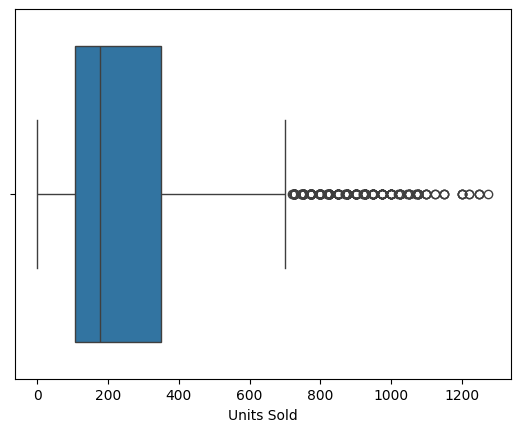

In [227]:
sns.boxplot (x=df['Units Sold'])
plt.show()

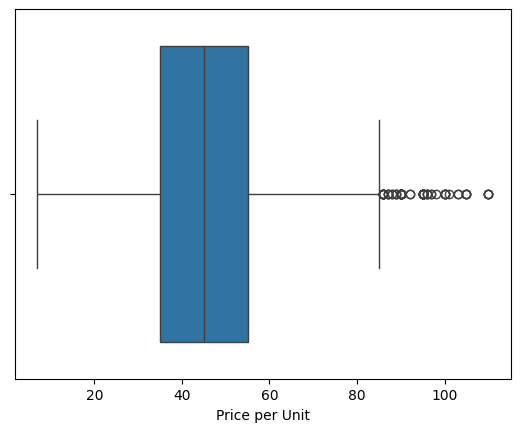

In [228]:
sns.boxplot (x=df['Price per Unit'])
plt.show()

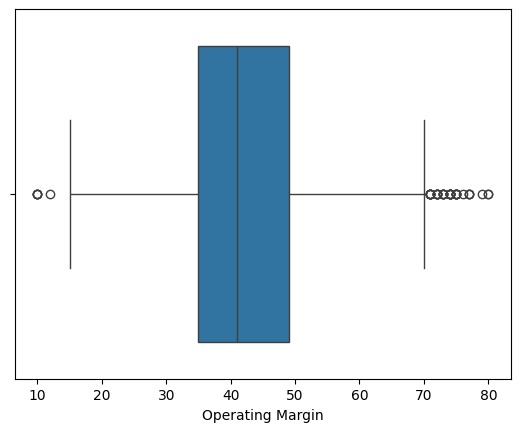

In [229]:
sns.boxplot(x=df['Operating Margin'])
plt.show()

In [230]:
from scipy import stats
Q1 = df['Units Sold'].quantile(0.25)
Q3 = df['Units Sold'].quantile(0.75)
IQR = Q3 - Q1
df_cleaned = df[(df['Units Sold'] >= (Q1 - 1.5 * IQR)) & (df['Units Sold'] <= (Q3 + 1.5 * IQR))]
df = df[(np.abs(stats.zscore(df['Price per Unit'])) < 3)]
df = df[(np.abs(stats.zscore(df['Operating Margin'])) < 3)]


<Axes: xlabel='Units Sold'>

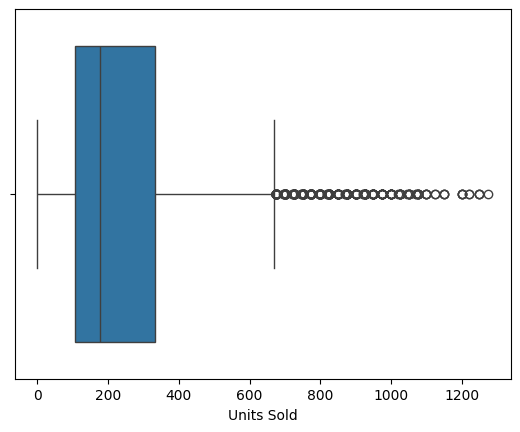

In [231]:
sns.boxplot(x=df['Units Sold'])

<Axes: xlabel='Price per Unit'>

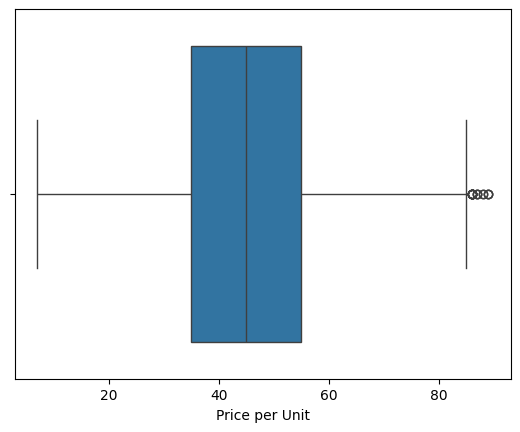

In [232]:
sns.boxplot(x=df['Price per Unit'])

<Axes: xlabel='Operating Margin'>

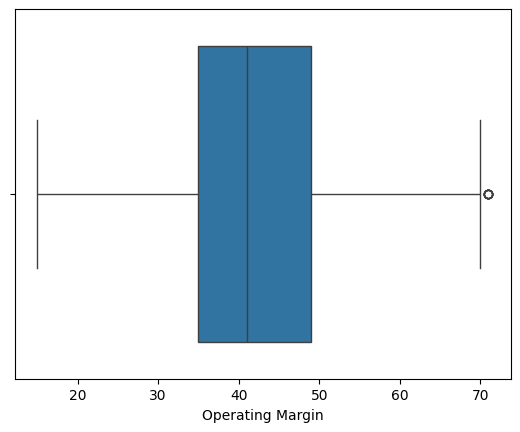

In [233]:
sns.boxplot(x=df['Operating Margin'])

In [234]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
df['Units Sold Scaled'] = scaler.fit_transform(df['Units Sold'].values.reshape(-1,1))
df['Price per Unit Scaled'] = scaler.fit_transform(df['Price per Unit'].values.reshape(-1,1))
df['Operating Margin Scaled'] = scaler.fit_transform(df['Operating Margin'].values.reshape(-1,1))

min_max_scaler = MinMaxScaler()
df['Units Sold Normalized'] = min_max_scaler.fit_transform(df['Units Sold'].values.reshape(-1,1))
df['Price per Unit Normalized'] = min_max_scaler.fit_transform(df['Price per Unit'].values.reshape(-1,1))
df['Operating Margin Normalized'] = min_max_scaler.fit_transform(df['Operating Margin'].values.reshape(-1,1))

print((df[['Units Sold', 'Units Sold Scaled', 'Units Sold Normalized', 'Price per Unit', 'Price per Unit Scaled', 'Price per Unit Normalized', 'Operating Margin', 'Operating Margin Scaled', 'Operating Margin Normalized']]).head())

   Units Sold  Units Sold Scaled  Units Sold Normalized  Price per Unit  \
0        1200           4.432373               0.941176            50.0   
1        1000           3.493913               0.784314            50.0   
2        1000           3.493913               0.784314            40.0   
3         850           2.790068               0.666667            45.0   
4         900           3.024683               0.705882            60.0   

   Price per Unit Scaled  Price per Unit Normalized  Operating Margin  \
0               0.362161                   0.524390              50.0   
1               0.362161                   0.524390              30.0   
2              -0.343595                   0.402439              35.0   
3               0.009283                   0.463415              35.0   
4               1.067917                   0.646341              30.0   

   Operating Margin Scaled  Operating Margin Normalized  
0                 0.815227                     0.625

In [235]:
df['Total Sales']=df['Units Sold']*df['Price per Unit']
df['Operating Profit']=df['Total Sales']*df['Operating Margin']/100
df['Operating Margin Relative'] = df['Operating Profit'] / df['Total Sales']
print(df[['Total Sales', 'Operating Profit', 'Operating Margin Relative']].head())

   Total Sales  Operating Profit  Operating Margin Relative
0      60000.0           30000.0                       0.50
1      50000.0           15000.0                       0.30
2      40000.0           14000.0                       0.35
3      38250.0           13387.5                       0.35
4      54000.0           16200.0                       0.30


In [236]:
df = pd.get_dummies(df, columns=['Product'])
print(df.head())

      Retailer  Retailer ID Invoice Date     Region     State      City  \
0  Foot Locker      1185732   2020-01-01  Northeast  New York  New York   
1  Foot Locker      1185732   2020-01-02  Northeast  New York  New York   
2  Foot Locker      1185732   2020-01-03  Northeast  New York  New York   
3  Foot Locker      1185732   2020-01-04  Northeast  New York  New York   
4  Foot Locker      1185732   2020-01-05  Northeast  New York  New York   

   Price per Unit  Units Sold  Total Sales  Operating Profit  ...  \
0            50.0        1200      60000.0           30000.0  ...   
1            50.0        1000      50000.0           15000.0  ...   
2            40.0        1000      40000.0           14000.0  ...   
3            45.0         850      38250.0           13387.5  ...   
4            60.0         900      54000.0           16200.0  ...   

   Units Sold Normalized Price per Unit Normalized  \
0               0.941176                  0.524390   
1               0.784314  

In [237]:
print("Antes del preprocesamiento:")
print(dforiginal.describe())
print("Después del preprocesamiento:")
print(df.describe())


Antes del preprocesamiento:
        Retailer ID                   Invoice Date  Price per Unit  \
count  9.648000e+03                           9648     9648.000000   
mean   1.173850e+06  2021-05-10 15:20:44.776119296       45.216625   
min    1.128299e+06            2020-01-01 00:00:00        7.000000   
25%    1.185732e+06            2021-02-17 00:00:00       35.000000   
50%    1.185732e+06            2021-06-04 00:00:00       45.000000   
75%    1.185732e+06            2021-09-16 00:00:00       55.000000   
max    1.197831e+06            2021-12-31 00:00:00      110.000000   
std    2.636038e+04                            NaN       14.705397   

        Units Sold    Total Sales  Operating Profit  Operating Margin  
count  9648.000000    9648.000000       9648.000000       9648.000000  
mean    256.930037   93273.437500      34425.269071         42.299129  
min       0.000000       0.000000          0.000000         10.000000  
25%     106.000000    4254.500000       1922.000000  